In [2]:
!pip install quandl

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'ipUenbDsMBeiiMe6iU5q'

In [3]:
data = quandl.get_table('ZILLOW/DATA')

In [4]:
data.head(5)

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2025-01-31,457847.242831
1,ZSFH,99999,2024-12-31,457250.597887
2,ZSFH,99999,2024-11-30,456891.816779
3,ZSFH,99999,2024-10-31,456998.542716
4,ZSFH,99999,2024-09-30,456517.913569


In [4]:
#Data subset
data_sub = data[['date', 'value']]

In [9]:
data_sub.head(5)

,date,value
None,,
0,2025-01-31,457847.242831
1,2024-12-31,457250.597887
2,2024-11-30,456891.816779
3,2024-10-31,456998.542716
4,2024-09-30,456517.913569


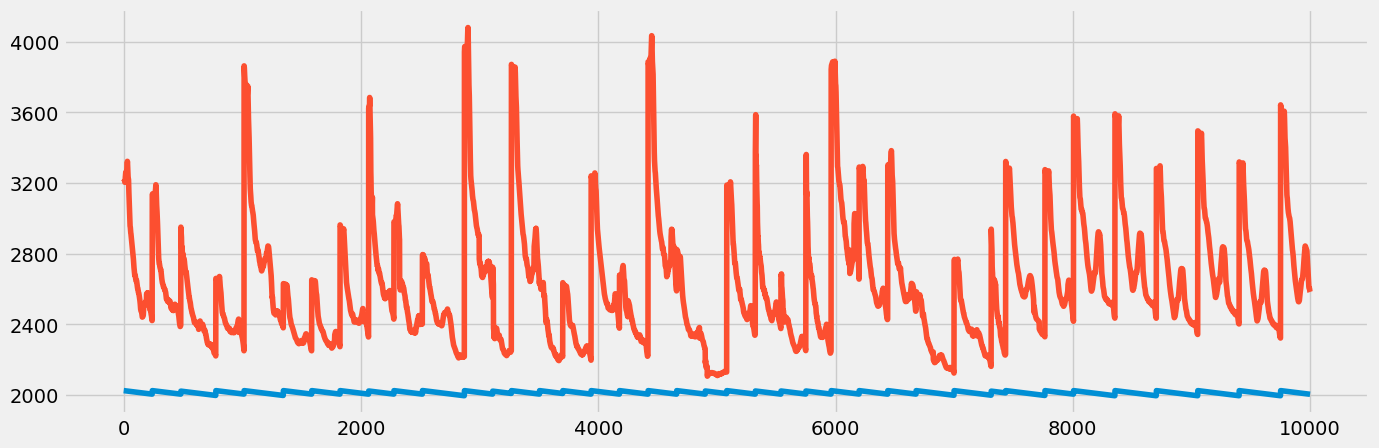

In [11]:
# Line chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)
plt.show()

In [19]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2025-01-31 to 2004-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB


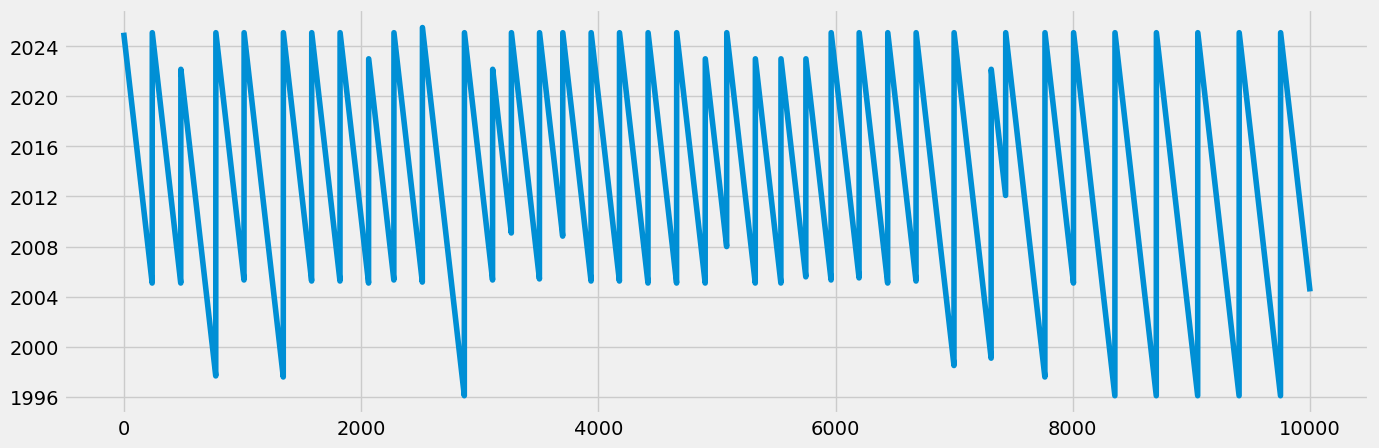

In [21]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub.index)
plt.show()

In [ ]:
# Analysis
This data is stationary

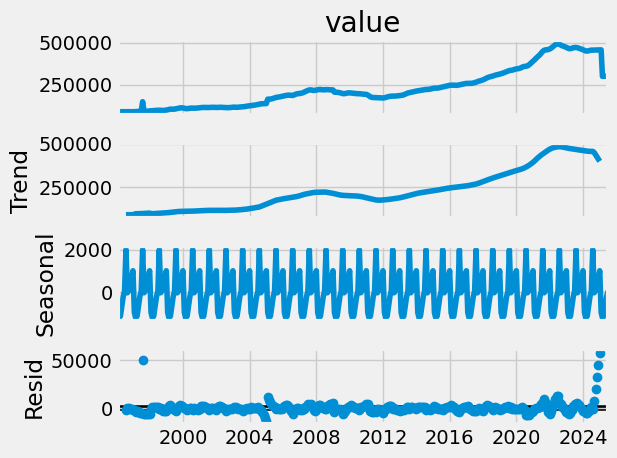

In [25]:
# Decompose time series

from statsmodels.tsa.seasonal import seasonal_decompose
data_sub = data_sub[~data_sub.index.duplicated(keep='first')]
data_sub = data_sub.asfreq('M')
decomposition = seasonal_decompose(data_sub['value'], model='additive')

# Plot results
decomposition.plot()
plt.show()

In [ ]:
# Interpretation: there is a long-term upward trend. Clear seasonality

In [26]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.112785
p-value                          0.709947
Number of Lags Used              0.000000
Number of Observations Used    353.000000
Critical Value (1%)             -3.449011
Critical Value (5%)             -2.869763
Critical Value (10%)            -2.571151
dtype: float64


In [5]:
# Differencing
data_diff = data_sub - data_sub.shift(1)

In [6]:
# Re-run Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.917310e+00
p-value                        1.064091e-14
Number of Lags Used            3.000000e+00
Number of Observations Used    9.996000e+03
Critical Value (1%)           -3.431004e+00
Critical Value (5%)           -2.861829e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [7]:
# Second round of Differencing
data_diff = data_sub - data_sub.shift(1)

In [8]:
# Third round Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.917310e+00
p-value                        1.064091e-14
Number of Lags Used            3.000000e+00
Number of Observations Used    9.996000e+03
Critical Value (1%)           -3.431004e+00
Critical Value (5%)           -2.861829e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


TypeError: float() argument must be a string or a real number, not 'Timestamp'

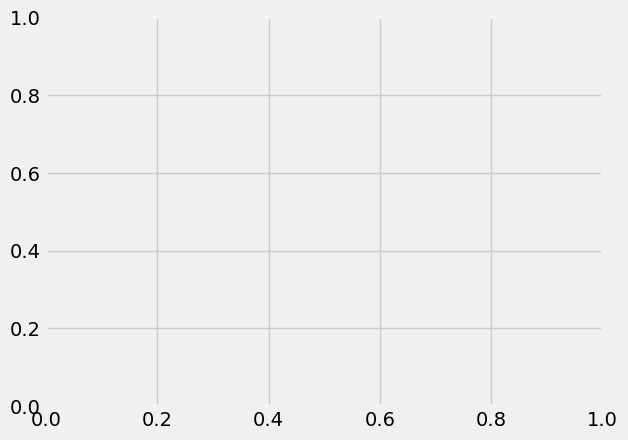

In [10]:
# Check autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()